In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model, Model

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


2023-02-23 14:32:30.534629: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-23 14:32:30.534667: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-23 14:32:30.570822: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-23 14:32:31.505147: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-23 14:32:31.505235: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train.shape # (60000, 28, 28)
X_test.shape #(10000, 28, 28)


(10000, 28, 28)

5

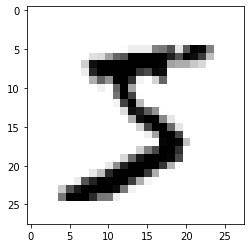

In [3]:
plt.imshow(X_train[0], cmap='binary')
y_train[0]

In [4]:
# (60000, 28, 28)
# (60000, 28, 28, 1) 형태로 만들어야 한다고???

# (x, y, 1) grayscale
# (x, y, 3) color

# X_train = X_train.reshape(60000, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1) # 입력 값은 니가 알아서...
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train / 255.0 # scale
X_test = X_test / 255.0 # scale


In [5]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', strides=1, activation='relu', input_shape=(28,28,1,)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='valid', strides=1, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 36)          14436     
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               295040    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

2023-02-23 14:32:34.430887: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-23 14:32:34.430919: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-23 14:32:34.430942: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (master): /proc/driver/nvidia/version does not exist


In [6]:
hist = model.fit(X_train, y_train, batch_size=200, epochs=1, validation_split=0.2)

240/240 [==============================] - 19s 78ms/step - loss: 0.2688 - accuracy: 0.9241 - val_loss: 0.0819 - val_accuracy: 0.9772


In [7]:
score = model.evaluate(X_test, y_test)
print(score)

313/313 [==============================] - 2s 6ms/step - loss: 0.0708 - accuracy: 0.9797
[0.07081109285354614, 0.9797000288963318]


In [9]:
'''
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 36)          14436     
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               295040    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
=================================================================
Total params: 311,182
Trainable params: 311,182
Non-trainable params: 0
_________________________________________________________________
'''

l1 = model.get_layer('conv2d') # 이거 이름이 자꾸 바뀜
# l1.get_weights()
l1.get_weights()[0].shape # 첫번째 conv layer가 가지고 있는 weights의 갯수 (5, 5, 1, 16)

# (16, 5, 5, 1) 형태로 변경해서 이미지 표현?



(5, 5, 1, 16)

In [11]:
def plot_weight(w):
    w_min = np.min(w)
    w_max = np.max(w)
    num_grid = math.ceil(math.sqrt(w.shape[3]))
    fix, axis = plt.subplots(num_grid, num_grid)
    for i, ax in enumerate(axis.flat):
        if i < w.shape[3]:
            img = w[:,:,0,i]
            ax.imshow(img, vmin=w_min, vmax=w_max)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
        

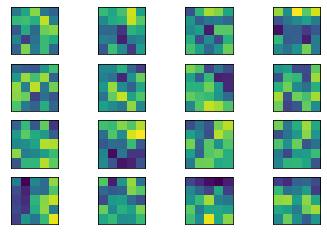

In [12]:

l1 = model.get_layer('conv2d')
w1 = l1.get_weights()[0]
plot_weight(w1)


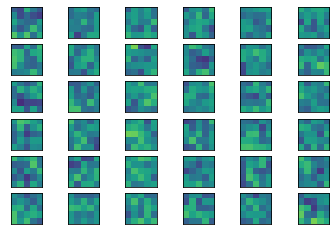

In [14]:
l2 = model.get_layer('conv2d_1')
w2 = l2.get_weights()[0]
plot_weight(w2)

In [20]:
'''
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 36)          14436     
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               295040    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
=================================================================
Total params: 311,182
Trainable params: 311,182
Non-trainable params: 0
_________________________________________________________________
'''

# temp_model = Model(inputs, outputs)
# temp_model = Model(inputs=model.get_layer('conv2d').input, outputs=model.get_layer('conv2d').output)

temp_model = Model(inputs=model.get_layer('conv2d').input, outputs=model.get_layer('conv2d_1').output)
output = temp_model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [17]:
output.shape

(10000, 24, 24, 16)

In [21]:
def plot_output(output):
    num_grid = math.ceil(math.sqrt(output.shape[3]))
    fix, axis = plt.subplots(num_grid, num_grid)
    for i, ax in enumerate(axis.flat):
        if i < output.shape[3]:
            img = output[0,:,:,i]
            ax.imshow(img, cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
        

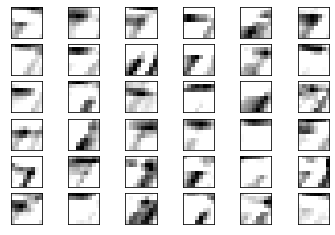

In [22]:
plot_output(output)